In [1]:
path = 'Pokemon.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

NameError: name 'pd' is not defined

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
path = 'Pokemon.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.columns.values.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [6]:
df.isnull().any().any()

True

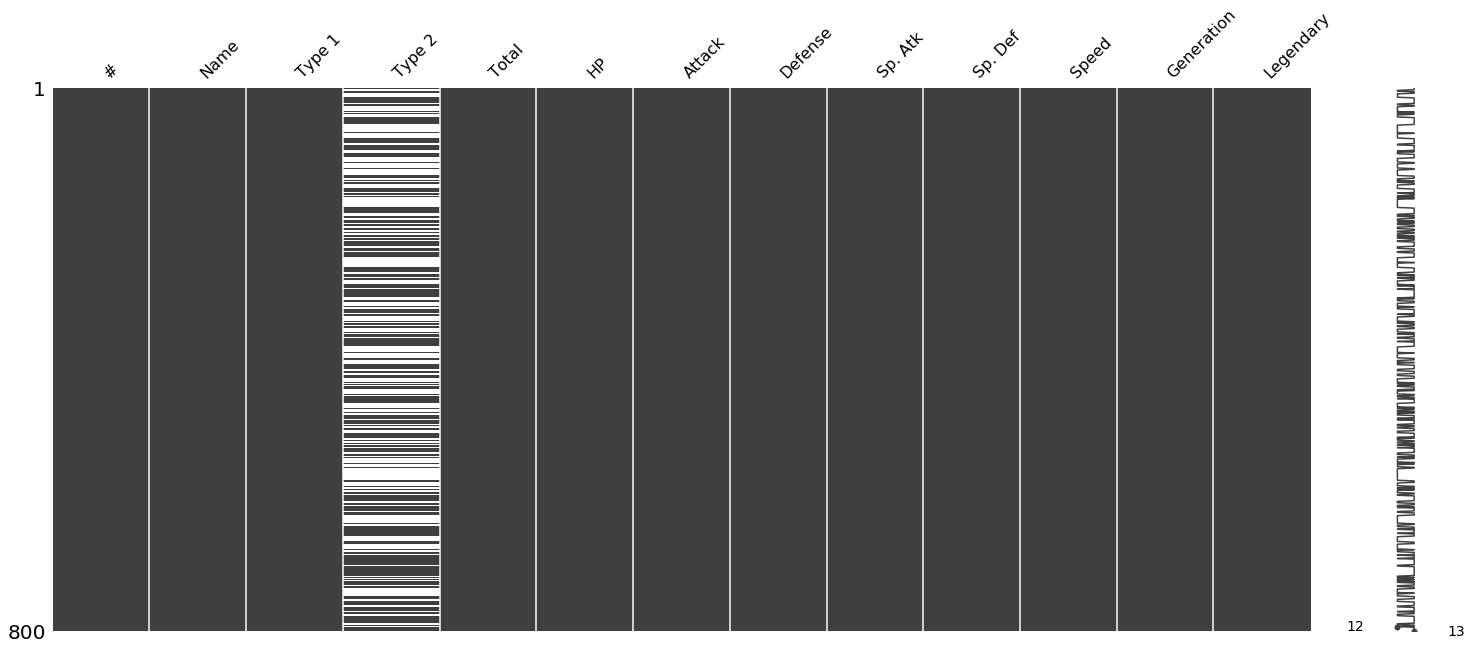

In [7]:
msno.matrix(df)

In [8]:
df.columns[df.isnull().any()].tolist()

['Type 2']

In [9]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
df['HP'].values

array([ 45,  60,  80,  80,  39,  58,  78,  78,  78,  44,  59,  79,  79,
        45,  50,  60,  40,  45,  65,  65,  40,  63,  83,  83,  30,  55,
        40,  65,  35,  60,  35,  60,  50,  75,  55,  70,  90,  46,  61,
        81,  70,  95,  38,  73, 115, 140,  40,  75,  45,  60,  75,  35,
        60,  60,  70,  10,  35,  40,  65,  50,  80,  40,  65,  55,  90,
        40,  65,  90,  25,  40,  55,  55,  70,  80,  90,  50,  65,  80,
        40,  80,  40,  55,  80,  50,  65,  90,  95,  95,  25,  50,  52,
        35,  60,  65,  90,  80, 105,  30,  50,  30,  45,  60,  60,  35,
        60,  85,  30,  55,  40,  60,  60,  95,  50,  60,  50,  50,  90,
        40,  65,  80, 105, 250,  65, 105, 105,  30,  55,  45,  80,  30,
        60,  40,  70,  65,  65,  65,  65,  65,  75,  20,  95,  95, 130,
        48,  55, 130,  65,  65,  65,  35,  70,  30,  60,  80,  80, 160,
        90,  90,  90,  41,  61,  91, 106, 106, 106, 100,  45,  60,  80,
        39,  58,  78,  50,  65,  85,  35,  85,  60, 100,  40,  5

In [12]:
df.groupby('Speed').agg(['count', 'size', 'nunique']).stack()

#  Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
Speed                                                                         
5     count    2     2       2       1      2   2       2        2        2   
      size     2     2       2       2      2   2       2        2        2   
      nunique  2     2       2       1      2   2       2        2        2   
10    count    3     3       3       1      3   3       3        3        3   
      size     3     3       3       3      3   3       3        3        3   
...           ..   ...     ...     ...    ...  ..     ...      ...      ...   
160   size     1     1       1       1      1   1       1        1        1   
      nunique  1     1       1       1      1   1       1        1        1   
180   count    1     1       1       0      1   1       1        1        1   
      size     1     1       1       1      1   1       1        1        1   
      nunique  1     1       1       0      1   1       1        1        1   

               Sp. Def  Generation  Legendary  
Speed                                          
5     count          2           2          2  
      size           2           2          2  
      nunique        2           2          1  
10    count          3           3          3  
      size           3           3          3  
...                ...         ...        ...  
160   size           1           1          1  
      nunique        1           1          1  
180   count          1           1          1  
      size           1           1          1  
      nunique        1           1          1  

[324 rows x 12 columns]

In [13]:
df_copy = df.copy()
df_copy.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
df_copy['Attack'].mean() 

79.00125

In [16]:
df_copy['Attack'][df_copy['Attack'] == 80]

22     80
23     80
47     80
50     80
56     80
61     80
72     80
80     80
95     80
113    80
151    80
173    80
197    80
218    80
225    80
234    80
245    80
252    80
260    80
312    80
373    80
396    80
400    80
417    80
463    80
473    80
486    80
525    80
530    80
547    80
566    80
592    80
661    80
744    80
748    80
755    80
777    80
Name: Attack, dtype: int64

In [17]:
df_copy['Name'][df_copy['Attack'] == 80]

22                 Pidgeot
23     PidgeotMega Pidgeot
47                  Golbat
50               Vileplume
56                 Dugtrio
61                  Mankey
72                  Machop
80                 Geodude
95                  Grimer
113                Marowak
151                 Kabuto
173               Croconaw
197              Bellossom
218              Girafarig
225               Snubbull
234              Teddiursa
245               Skarmory
252               Porygon2
260                Miltank
312               Vigoroth
373               Corphish
396                 Glalie
400                Walrein
417                 Latias
463              Vespiquen
473               Drifblim
486                 Bonsly
525              Porygon-Z
530               Froslass
547                 Phione
566                Herdier
592                Timburr
661                  Klang
744                Furfrou
748                Honedge
755               Slurpuff
777                 Klefki
N

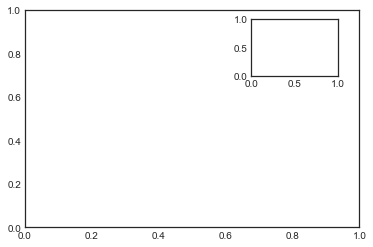

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

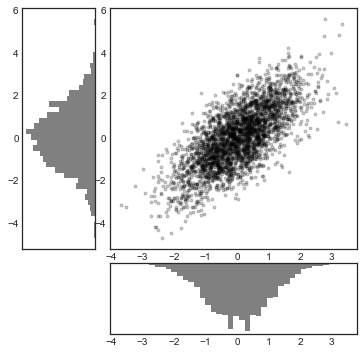

In [19]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Frequencia de HP')

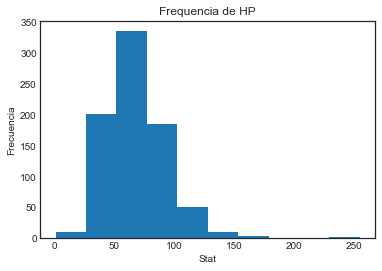

In [20]:
plt.hist(df_copy['HP'])
plt.xlabel('Stat')
plt.ylabel('Frecuencia')
plt.title('Frequencia de HP')